# Contact Tracing 

#### **In this model,we use digital contact tracing algorithm that relies on GPS data, which can be used in contact tracing with machine learning.**

Once a person is affected by corona virus, It is very important for us to identify the people who might have been in contact with the person.


In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/livedata.json" #It is a json file
df = pd.read_json(url)
df.head(10)

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
5,Erin,2020-07-04 14:35:30,13.132235,77.694382
6,Bob,2020-07-04 13:35:30,13.224501,77.668313
7,Grace,2020-07-04 14:35:30,13.142778,77.691560
8,Alice,2020-07-04 22:35:30,13.090368,77.561579
9,Frank,2020-07-04 12:35:30,13.208293,77.664607


In [2]:
df.shape

(100, 4)

#### There are 100 records in the json file. The table shows the person's location at what time and at what location (latitude,longitude)

In [3]:
# Lets check if our model has NaN value of empty value
columns=df.columns.values
for data in columns:
    print(data ,':',sum(pd.isnull(df[data])))


id : 0
timestamp : 0
latitude : 0
longitude : 0


We dont have any null values in our data file

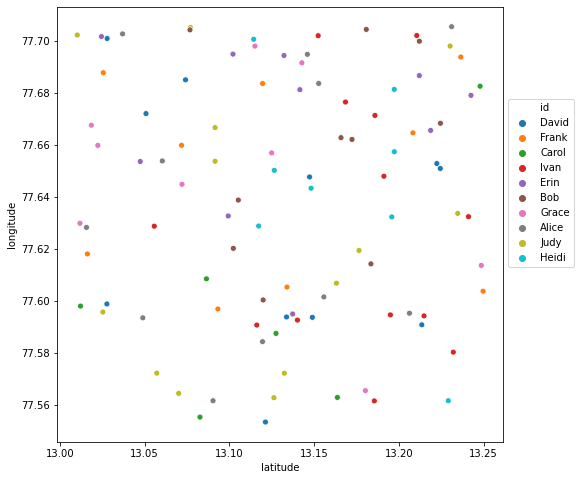

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,8))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()

From the graph ,we can say that people Erin and david were almost at same location. Similarly there are lot of people in the region of longitude 77.58 to 77.60 and latitude 13.10 to 13.15

### **DBSCAN model for Contact Tracing**

In [5]:
import datetime as dt
from sklearn.cluster import DBSCAN

def probab_infected_people(name):
  epsilon = 0.0018288 
  # a radial distance of 6 feet in kilometers

  model = DBSCAN(eps=epsilon ,min_samples=2, metric ='haversine')
  model.fit(df[['latitude','longitude']])
  
  df['cluster'] = model.labels_.tolist()

  input_name_clusters=[]

  for i in range(len(df)):
    if (df['id'][i] == name):
      if (df['cluster'][i] in input_name_clusters):
        pass
      else:
        input_name_clusters.append(df['cluster'][i])

  infected=[]

  for cluster in input_name_clusters:
    if (cluster!= -1) :
      cluster_ids = df.loc[df['cluster'] == cluster, 'id']
      for i in range(len(cluster_ids)):
        member_id = cluster_ids.iloc[i]
        if (member_id not in infected) and (member_id != name):
          infected.append(member_id)
          
        else:
          pass

  return infected



In [6]:
print(probab_infected_people("Bob"))

['Judy']
